<a href="https://colab.research.google.com/github/2003a52071/statml/blob/main/project_DT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data=pd.read_csv('/content/Data_for_UCI_named (1).csv')

In [ ]:
print(data)

          tau1      tau2      tau3      tau4        p1        p2        p3  \
0     2.959060  3.079885  8.381025  9.780754  3.763085 -0.782604 -1.257395   
1     9.304097  4.902524  3.047541  1.369357  5.067812 -1.940058 -1.872742   
2     8.971707  8.848428  3.046479  1.214518  3.405158 -1.207456 -1.277210   
3     0.716415  7.669600  4.486641  2.340563  3.963791 -1.027473 -1.938944   
4     3.134112  7.608772  4.943759  9.857573  3.525811 -1.125531 -1.845975   
...        ...       ...       ...       ...       ...       ...       ...   
9995  2.930406  9.487627  2.376523  6.187797  3.343416 -0.658054 -1.449106   
9996  3.392299  1.274827  2.954947  6.894759  4.349512 -1.663661 -0.952437   
9997  2.364034  2.842030  8.776391  1.008906  4.299976 -1.380719 -0.943884   
9998  9.631511  3.994398  2.757071  7.821347  2.514755 -0.966330 -0.649915   
9999  6.530527  6.781790  4.349695  8.673138  3.492807 -1.390285 -1.532193   

            p4        g1        g2        g3        g4      sta

In [ ]:
data.shape

(10000, 14)

In [ ]:
data.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [ ]:
#check missing values in the data
data.isnull().sum()


tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64

In [ ]:
#seperate independent and dependent variables
y=data['stabf']
X=data.drop(['stabf'],axis=1)

In [ ]:
y=y.replace("unstable",0)
y=y.replace("stable",1)

In [ ]:
#importing train test split to create vadidation set 
from sklearn.model_selection import train_test_split

In [ ]:
#creating the train and validation set
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state = 101, stratify=y, test_size=0.30)

In [ ]:
#distribution in training set
y_train.value_counts(normalize=True)

0    0.638
1    0.362
Name: stabf, dtype: float64

In [ ]:
#distribution in validation set
y_valid.value_counts(normalize=True)

0    0.638
1    0.362
Name: stabf, dtype: float64

In [ ]:
#shape of training set
X_train.shape, y_train.shape

((7000, 13), (7000,))

In [ ]:
#shape of validation set
X_valid.shape, y_valid.shape

((3000, 13), (3000,))

In [ ]:
#importimg decision tree classifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#importimg decision tree regressor
from sklearn.tree import DecisionTreeRegressor

In [ ]:
#creating the decision tree function
dt_model = DecisionTreeClassifier(random_state=10)

In [ ]:
#fitting the model
dt_model.fit(X_train , y_train)

DecisionTreeClassifier(random_state=10)

In [ ]:
#checking the training score
dt_model.score(X_train, y_train)

1.0

In [ ]:
#checking the validation score
dt_model.score(X_valid, y_valid)

0.9996666666666667

In [ ]:
#predictions on validation set
dt_model.predict(X_valid)

array([1, 1, 1, ..., 0, 1, 0])

In [ ]:
dt_model.predict_proba(X_valid)

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]])

In [ ]:
y_pred = dt_model.predict_proba(X_valid) [:,1]

In [ ]:
new_y = []
for i in range(len(y_pred)):
    if y_pred[i] < 0.4:
       new_y.append(0)
    else:
       new_y.append(1)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_valid, new_y)

0.9996666666666667

In [ ]:
train_accuracy = []
validation_accuracy = []
for depth in range(1,10):
    dt_model = DecisionTreeClassifier(max_depth=depth, random_state=10)
    dt_model.fit(X_train,y_train)
    train_accuracy.append(dt_model.score(X_train, y_train))
    validation_accuracy.append(dt_model.score(X_valid, y_valid))

In [ ]:
frame = pd.DataFrame({'max_depth':range(1,10), 'train_acc':train_accuracy, 'valid_acc':validation_accuracy})
frame.head()

,max_depth,train_acc,valid_acc
0,1,1.0,0.999667
1,2,1.0,0.999667
2,3,1.0,0.999667
3,4,1.0,0.999667
4,5,1.0,0.999667


No handles with labels found to put in legend.


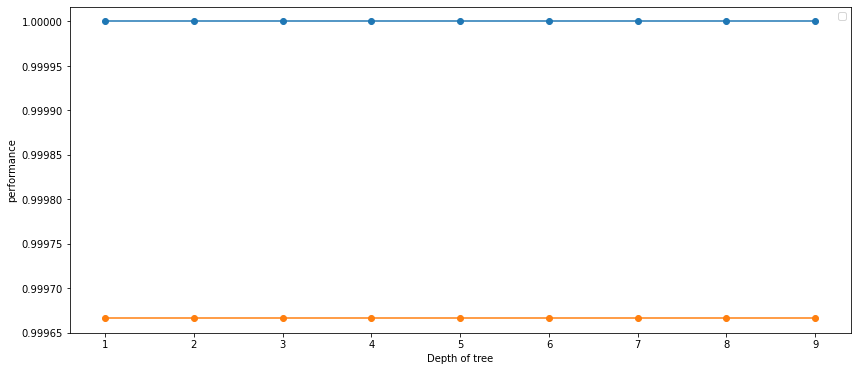

In [ ]:
plt.figure(figsize=(14,6))
plt.plot(frame['max_depth'], frame['train_acc'], marker='o')
plt.plot(frame['max_depth'], frame['valid_acc'], marker='o')
plt.xlabel('Depth of tree')
plt.ylabel('performance')
plt.legend()

In [ ]:
dt_model = DecisionTreeClassifier(max_depth=8, max_leaf_nodes=25, random_state=10)

In [ ]:
#fitting the model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, max_leaf_nodes=25, random_state=10)

In [ ]:
#training score
dt_model.score(X_train, y_train)

1.0

In [ ]:
#validation score
dt_model.score(X_valid, y_valid)

0.9996666666666667

[Text(0.5, 0.75, 'X[12] <= 0.0\ngini = 0.462\nsamples = 7000\nvalue = [4466, 2534]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2534\nvalue = [0, 2534]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 4466\nvalue = [4466, 0]')]

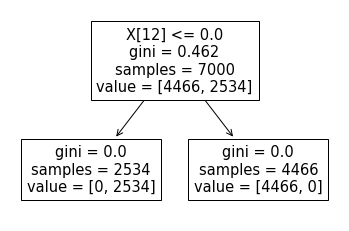

In [ ]:
from sklearn import tree
tree.plot_tree(dt_model,)

In [ ]:
!pip install graphviz

In [ ]:
decision_tree = tree.export_graphviz(dt_model,out_file='tree.dot',feature_names=X_train.columns,max_depth=10,filled=True)

In [ ]:
!dot -Tpng tree.dot -o tree.png

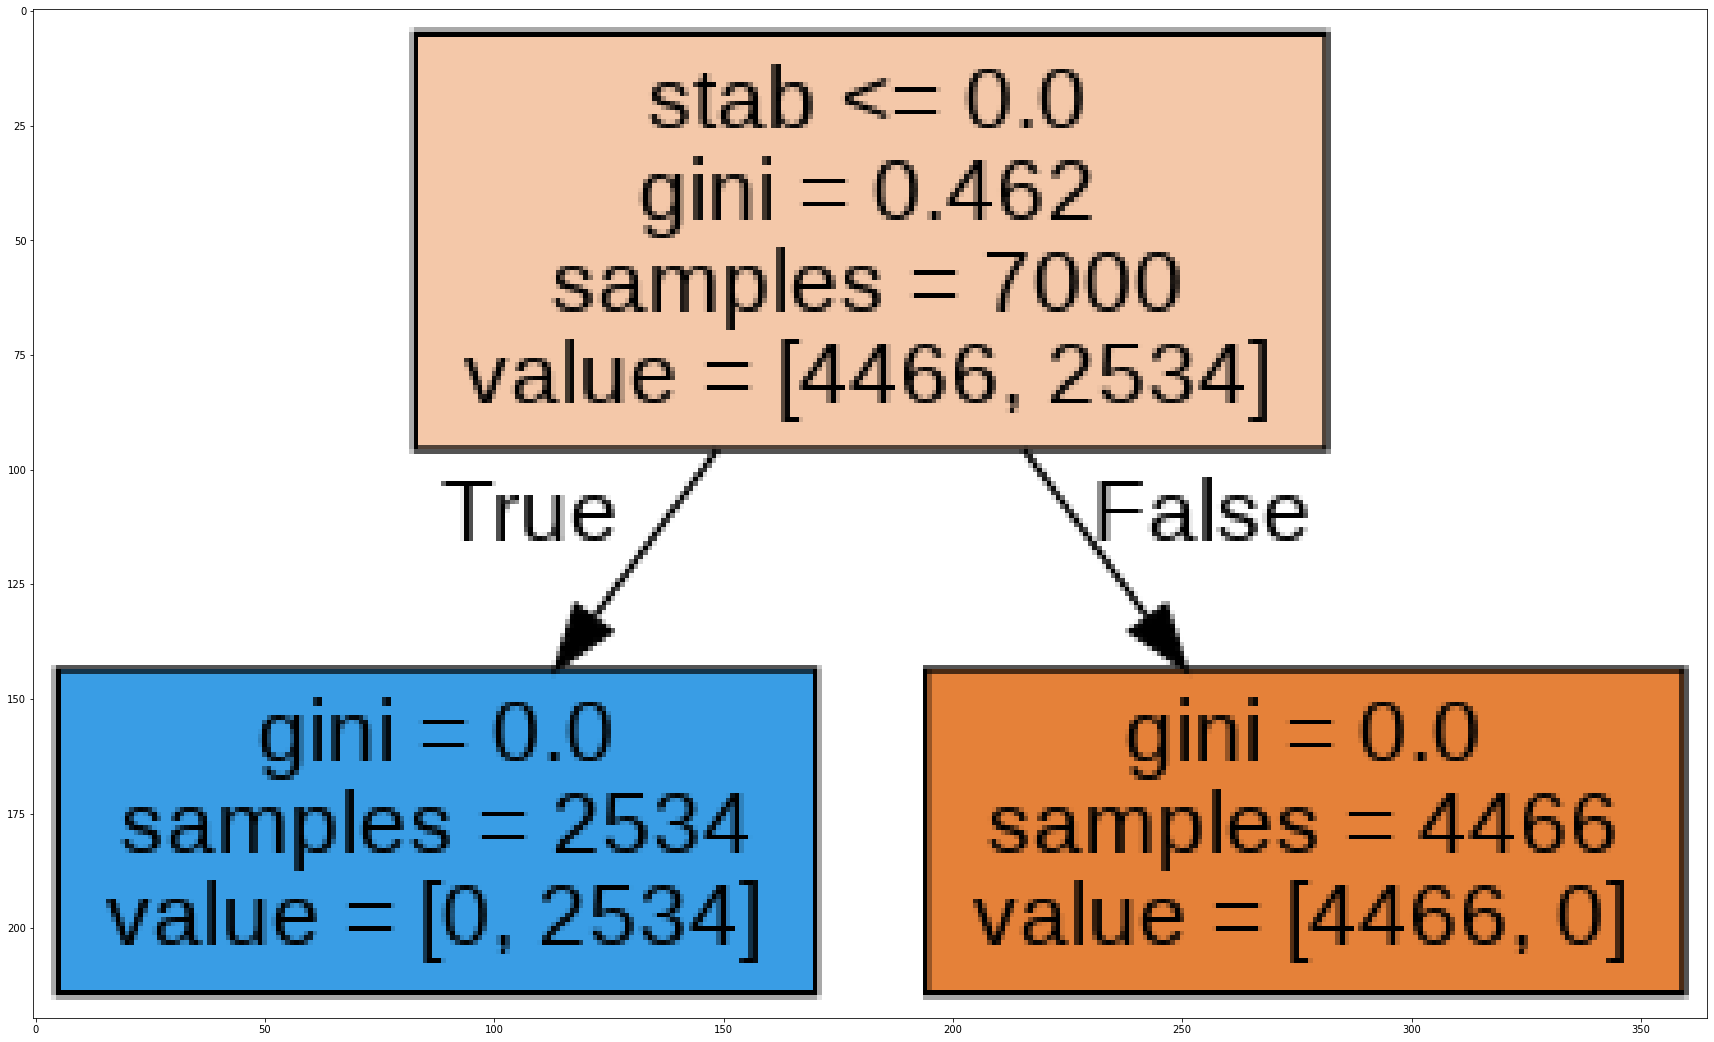

In [ ]:
image =plt.imread('tree.png')
plt.figure(figsize=(30,30))
plt.imshow(image)